In [1]:
import numpy as np
from scipy.fft import fft, ifft, fftshift
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import pickle
from copy import copy
%matplotlib inline

In [2]:
def xp_mat_maker(xvals, p):
    xp = np.ones((xvals.size, p+1))
    for jj in range(p):
        xp[:, jj+1] = xvals * xp[:, jj]
    return xp

In [3]:
def least_squares_solve(mat, yvals):
    u, s, vt = np.linalg.svd(mat, full_matrices=False)
    alpha = (vt.T @ np.diag(1./s) @ u.T) @ yvals.reshape(-1, 1)
    error = np.linalg.norm(mat @ alpha - yvals.reshape(-1, 1))**2./(2.*yvals.size)
    return alpha, error 

In [4]:
def least_squares_solve_w_cond(mat, yvals, lam_val):
    u, s, vt = np.linalg.svd(mat, full_matrices=False)
    regxmat = (vt.T @ np.diag(s/(s**2.+lam_val)) @ u.T)
    alpha = regxmat @ yvals.reshape(-1, 1)
    error = np.linalg.norm(mat @ alpha - yvals.reshape(-1, 1))**2./(2.*yvals.size)
    return alpha, error, regxmat

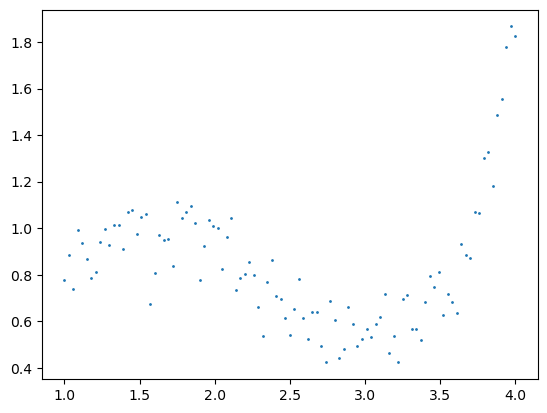

In [5]:
# equispaced data 

xvals = np.linspace(1., 4., int(1e2)+1)
sig = .1
ftrue = lambda x: x - x**3./6. + x**5./120.

yvals = ftrue(xvals) + sig*np.random.randn(xvals.size)

plt.scatter(xvals, yvals, s=1.)

In [6]:
pvals = [1, 2, 3, 4, 5]
models = [None]*len(pvals)
alphas = [None]*len(pvals)
errors = [None]*len(pvals)

for cnt, pval in enumerate(pvals):
    models[cnt] = xp_mat_maker(xvals, pval)
    alphas[cnt], errors[cnt] = least_squares_solve(models[cnt], yvals)



Model residual for p = 1: 0.04017838429240704
Condition number of model matrix is: 9.053283909351187

Model residual for p = 2: 0.02487303099190672
Condition number of model matrix is: 99.01043219719828

Model residual for p = 3: 0.006058185888137422
Condition number of model matrix is: 1301.6306468318915

Model residual for p = 4: 0.00529215188114272
Condition number of model matrix is: 18639.389991051554

Model residual for p = 5: 0.005135611037778089
Condition number of model matrix is: 279675.8029003021



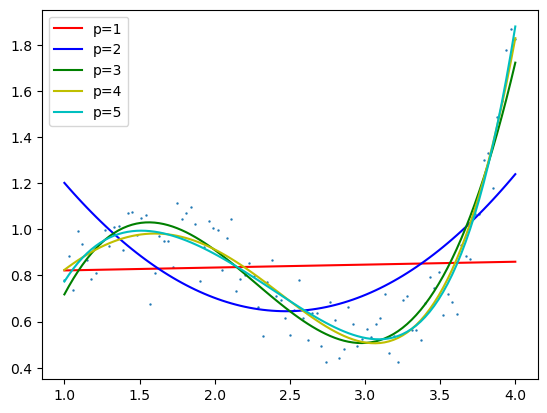

In [7]:
plt.scatter(xvals, yvals, s=.5)
colors = ['r', 'b', 'g', 'y', 'c']
for cnt, pval in enumerate(pvals):
    myfit = models[cnt] @ alphas[cnt].reshape(-1, 1)
    plt.plot(xvals, myfit, c=colors[cnt], label="p="+str(pval))
    print(f"Model residual for p = {pval}: {errors[cnt]}")
    print(f"Condition number of model matrix is: {np.linalg.cond(models[cnt])}\n")
plt.legend()

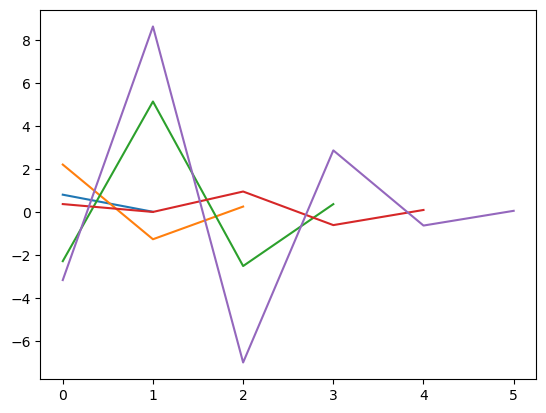

In [8]:
for jj in range(len(pvals)):
    plt.plot(alphas[jj])

## Regularization

How to deal with increasingly poor conditioning of your model.

In [9]:
pvals = [1, 2, 3, 4, 5]
models = [None]*len(pvals)
alphas = [None]*len(pvals)
errors = [None]*len(pvals)
regmats = [None]*len(pvals)
lam_val = .1

for cnt, pval in enumerate(pvals):
    models[cnt] = xp_mat_maker(xvals, pval)
    alphas[cnt], errors[cnt], regmats[cnt] = least_squares_solve_w_cond(models[cnt], yvals, lam_val)

Model residual for p = 1: 0.04018123652223066
Condition number of model matrix is: 8.962564395311736

Model residual for p = 2: 0.025186955447418738
Condition number of model matrix is: 87.82576946270669

Model residual for p = 3: 0.010120220003737688
Condition number of model matrix is: 443.36749265447145

Model residual for p = 4: 0.00531714459165156
Condition number of model matrix is: 1089.2970087609394

Model residual for p = 5: 0.005283586166555727
Condition number of model matrix is: 5726.742620713842



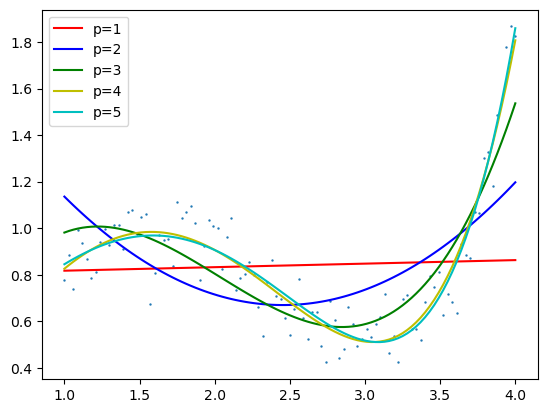

In [10]:
plt.scatter(xvals, yvals, s=.5)
colors = ['r', 'b', 'g', 'y', 'c']
for cnt, pval in enumerate(pvals):
    myfit = models[cnt] @ alphas[cnt].reshape(-1, 1)
    plt.plot(xvals, myfit, c=colors[cnt], label="p="+str(pval))
    print(f"Model residual for p = {pval}: {errors[cnt]}")
    print(f"Condition number of model matrix is: {np.linalg.cond(regmats[cnt])}\n")
plt.legend()

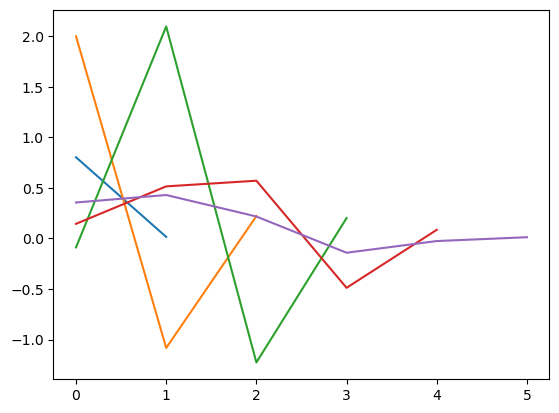

In [11]:
for jj in range(len(pvals)):
    plt.plot(alphas[jj])